<a href="https://colab.research.google.com/github/NitNay/NitNay/blob/main/property_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

In [7]:
# Load the training dataset
dataset = pd.read_csv('Property_Price_Train.csv')

# Load the testing dataset
dataset = pd.read_csv('Property_Price_Test.csv')

In [8]:
dataset.head()

,Id,Building_Class,Zoning_Class,Lot_Extent,Lot_Size,Road_Type,Lane_Type,Property_Shape,Land_Outline,Utility_Type,...,Screen_Lobby_Area,Pool_Area,Pool_Quality,Fence_Quality,Miscellaneous_Feature,Miscellaneous_Value,Month_Sold,Year_Sold,Sale_Type,Sale_Condition
0,1461,20,RHD,80.0,16104.819760,Paved,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RLD,81.0,15639.150810,Paved,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RLD,74.0,3849.428920,Paved,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RLD,78.0,4955.447942,Paved,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RLD,43.0,3046.604942,Paved,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Id                         1459 non-null   int64  
 1   Building_Class             1459 non-null   int64  
 2   Zoning_Class               1455 non-null   object 
 3   Lot_Extent                 1232 non-null   float64
 4   Lot_Size                   1459 non-null   float64
 5   Road_Type                  1459 non-null   object 
 6   Lane_Type                  107 non-null    object 
 7   Property_Shape             1459 non-null   object 
 8   Land_Outline               1459 non-null   object 
 9   Utility_Type               1457 non-null   object 
 10  Lot_Configuration          1459 non-null   object 
 11  Property_Slope             1459 non-null   object 
 12  Neighborhood               1459 non-null   object 
 13  Condition1                 1459 non-null   objec

In [ ]:
df = pd.DataFrame(dataset)

print(dataset.head())


     Id  Building_Class Zoning_Class  Lot_Extent      Lot_Size Road_Type  \
0  1461              20          RHD        80.0  16104.819760     Paved   
1  1462              20          RLD        81.0  15639.150810     Paved   
2  1463              60          RLD        74.0   3849.428920     Paved   
3  1464              60          RLD        78.0   4955.447942     Paved   
4  1465             120          RLD        43.0   3046.604942     Paved   

  Lane_Type Property_Shape Land_Outline Utility_Type  ... Screen_Lobby_Area  \
0       NaN            Reg          Lvl       AllPub  ...               120   
1       NaN            IR1          Lvl       AllPub  ...                 0   
2       NaN            IR1          Lvl       AllPub  ...                 0   
3       NaN            IR1          Lvl       AllPub  ...                 0   
4       NaN            IR1          HLS       AllPub  ...               144   

  Pool_Area Pool_Quality Fence_Quality Miscellaneous_Feature  \
0   

In [ ]:
# Check for missing values
print(dataset.isnull().sum())

Id                       0
Building_Class           0
Zoning_Class             4
Lot_Extent             227
Lot_Size                 0
                      ... 
Miscellaneous_Value      0
Month_Sold               0
Year_Sold                0
Sale_Type                1
Sale_Condition           0
Length: 80, dtype: int64


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Id                         1459 non-null   int64  
 1   Building_Class             1459 non-null   int64  
 2   Zoning_Class               1455 non-null   object 
 3   Lot_Extent                 1232 non-null   float64
 4   Lot_Size                   1459 non-null   float64
 5   Road_Type                  1459 non-null   object 
 6   Lane_Type                  107 non-null    object 
 7   Property_Shape             1459 non-null   object 
 8   Land_Outline               1459 non-null   object 
 9   Utility_Type               1457 non-null   object 
 10  Lot_Configuration          1459 non-null   object 
 11  Property_Slope             1459 non-null   object 
 12  Neighborhood               1459 non-null   object 
 13  Condition1                 1459 non-null   objec

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1459.0,2190.000000,421.321334,1461.000000,1825.500000,2190.000000,2554.500000,2919.0000
Building_Class,1459.0,57.378341,42.746880,20.000000,20.000000,50.000000,70.000000,190.0000
Lot_Extent,1232.0,68.580357,22.376841,21.000000,58.000000,67.000000,80.000000,200.0000
Lot_Size,1459.0,9872.044418,4960.234751,-4265.104479,6351.984222,9784.907361,13208.971525,26126.1903
Overall_Material,1459.0,6.078821,1.436812,1.000000,5.000000,6.000000,7.000000,10.0000
House_Condition,1459.0,5.553804,1.113740,1.000000,5.000000,5.000000,6.000000,9.0000
Construction_Year,1459.0,1971.357779,30.390071,1879.000000,1953.000000,1973.000000,2001.000000,2010.0000
Remodel_Year,1459.0,1983.662783,21.130467,1950.000000,1963.000000,1992.000000,2004.000000,2010.0000
Brick_Veneer_Area,1444.0,100.709141,177.625900,0.000000,0.000000,0.000000,164.000000,1290.0000
BsmtFinSF1,1458.0,439.203704,455.268042,0.000000,0.000000,350.500000,753.500000,4010.0000


In [ ]:
print("Duplicate Rows:")
print(f"Total: {df.duplicated().sum()}")

Duplicate Rows:
Total: 0


In [ ]:
basic_info = pd.DataFrame({
    "Features": df.columns,
    "Missing Values": df.isnull().sum().values,
    "Missing Values %": ((df.isnull().sum().values)/len(df)),
    "Unique Values": df.nunique().values,
    "Data Types": df.dtypes
})
basic_info.reset_index(drop=True)

,Features,Missing Values,Missing Values %,Unique Values,Data Types
0,Id,0,0.000000,1459,int64
1,Building_Class,0,0.000000,16,int64
2,Zoning_Class,4,0.002742,5,object
3,Lot_Extent,227,0.155586,115,float64
4,Lot_Size,0,0.000000,1459,float64
...,...,...,...,...,...
75,Miscellaneous_Value,0,0.000000,26,int64
76,Month_Sold,0,0.000000,12,int64
77,Year_Sold,0,0.000000,5,int64
78,Sale_Type,1,0.000685,9,object


In [ ]:
# Remove rows with any missing values
df_cleaned = df.dropna()

#Display information about missing values after cleaning
missing_values_after_cleaning = df_cleaned.isnull().sum()
missing_percent_after_cleaning = (missing_values_after_cleaning/ len(df_cleaned))*100

# Display the cleaned DataFrame and information about missing values
print("Cleaned DataFrame:")
print(df_cleaned)

print("\nMissing Values After Cleaning:")
print(pd.DataFrame({
    "Features": missing_percent_after_cleaning.index,
    "Missing Values": missing_values_after_cleaning.values,
    "Missing Values %": missing_percent_after_cleaning.values,
    "Unique Values": df_cleaned.nunique().values,
    "Data Type": df_cleaned.dtypes.values
  }))

Cleaned DataFrame:
Empty DataFrame
Columns: [Id, Building_Class, Zoning_Class, Lot_Extent, Lot_Size, Road_Type, Lane_Type, Property_Shape, Land_Outline, Utility_Type, Lot_Configuration, Property_Slope, Neighborhood, Condition1, Condition2, House_Type, House_Design, Overall_Material, House_Condition, Construction_Year, Remodel_Year, Roof_Design, Roof_Quality, Exterior1st, Exterior2nd, Brick_Veneer_Type, Brick_Veneer_Area, Exterior_Material, Exterior_Condition, Foundation_Type, Basement_Height, Basement_Condition, Exposure_Level, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, Total_Basement_Area, Heating_Type, Heating_Quality, Air_Conditioning, Electrical_System, First_Floor_Area, Second_Floor_Area, LowQualFinSF, Grade_Living_Area, Underground_Full_Bathroom, Underground_Half_Bathroom, Full_Bathroom_Above_Grade, Half_Bathroom_Above_Grade, Bedroom_Above_Grade, Kitchen_Above_Grade, Kitchen_Quality, Rooms_Above_Grade, Functional_Rate, Fireplaces, Fireplace_Quality, Garage, Ga

In [ ]:
df.drop_duplicates(inplace=True)

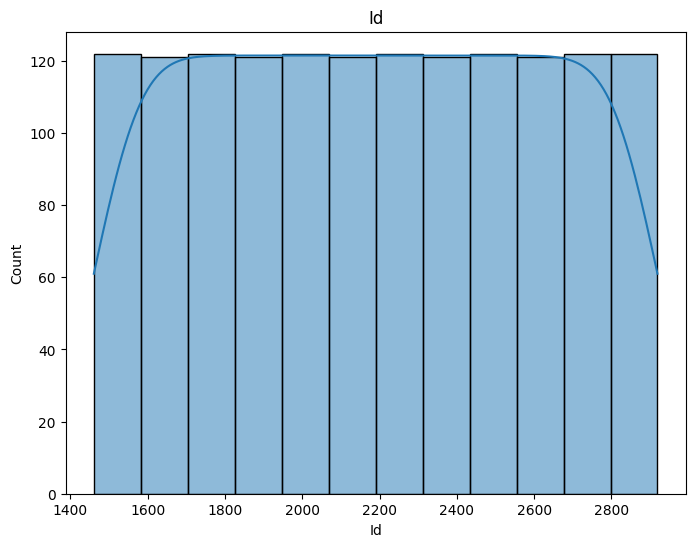

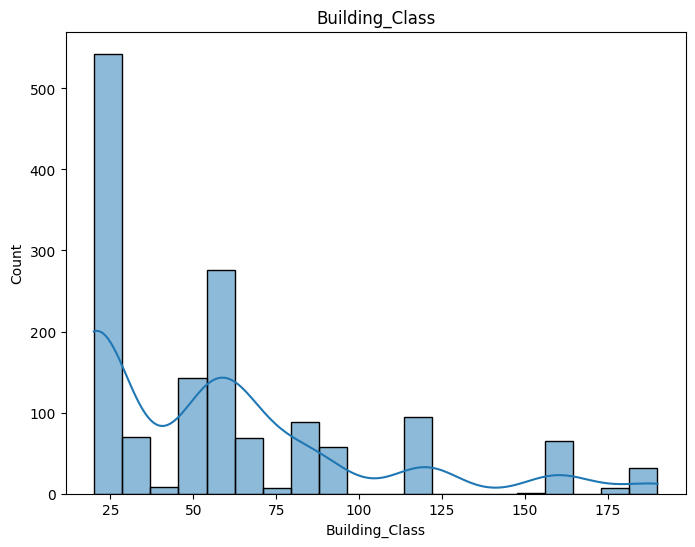

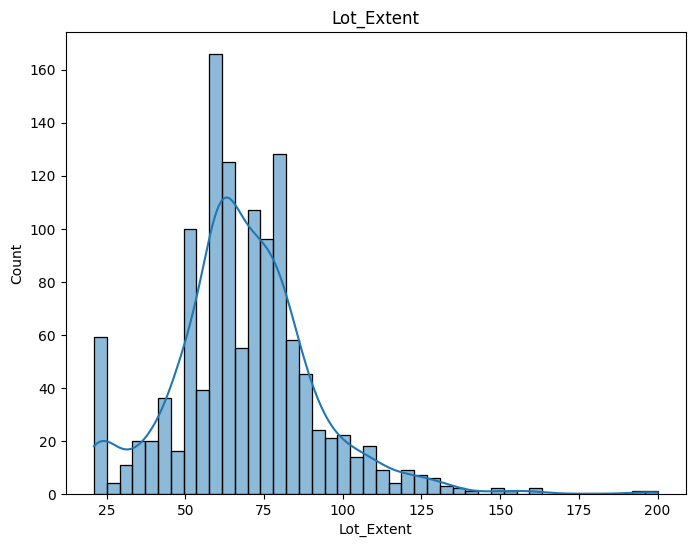

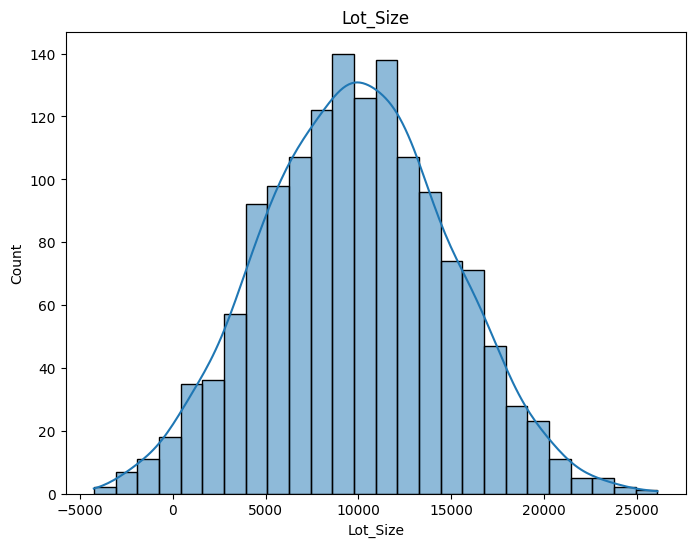

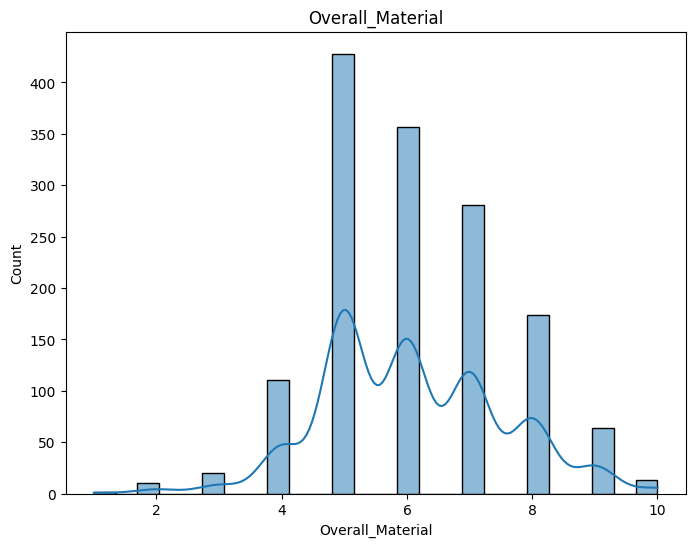

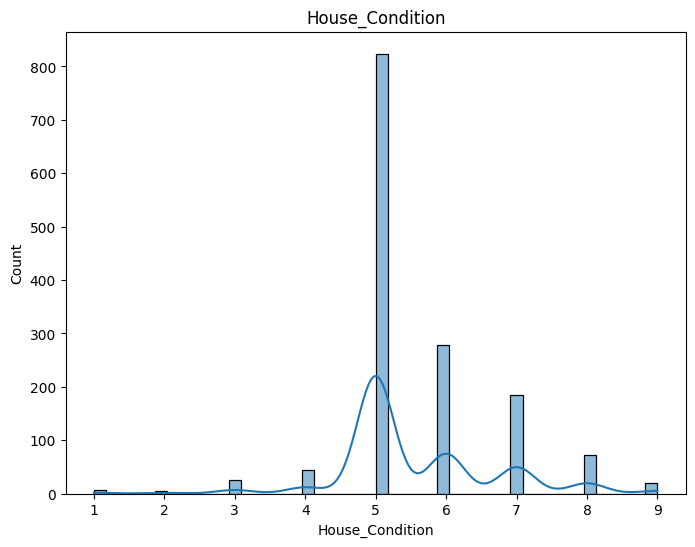

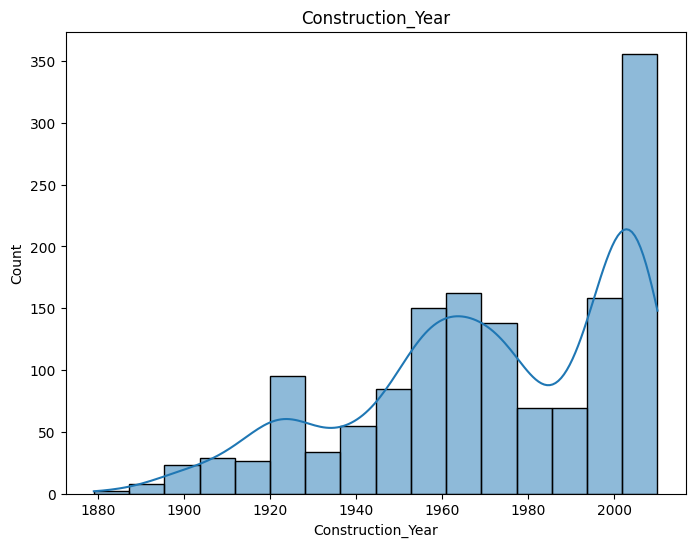

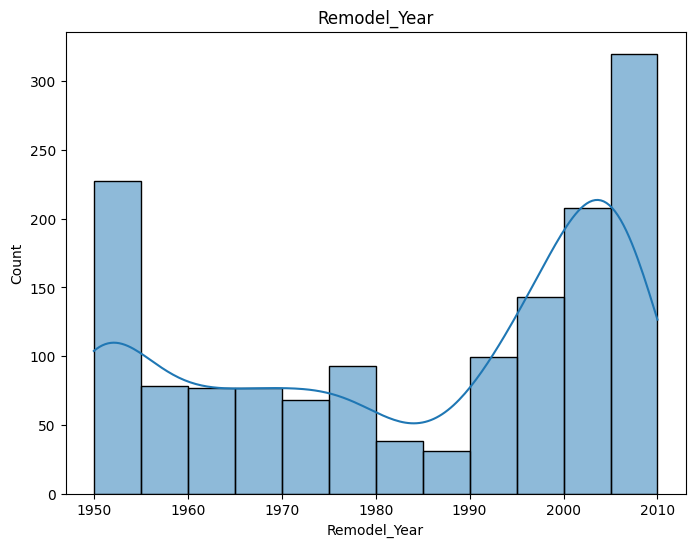

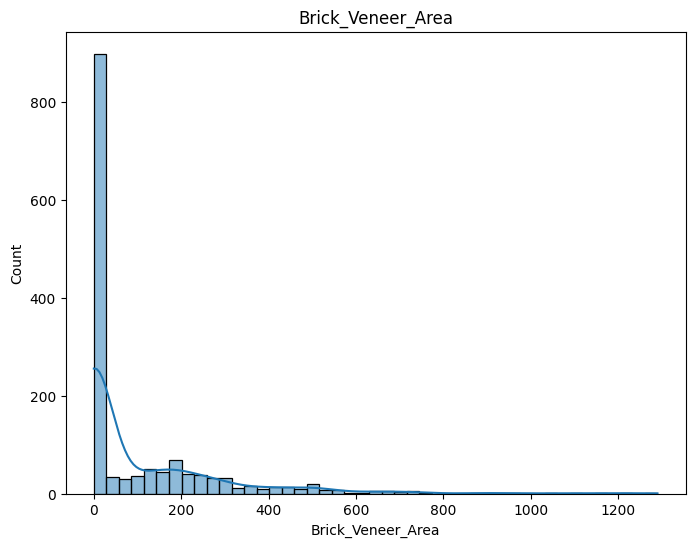

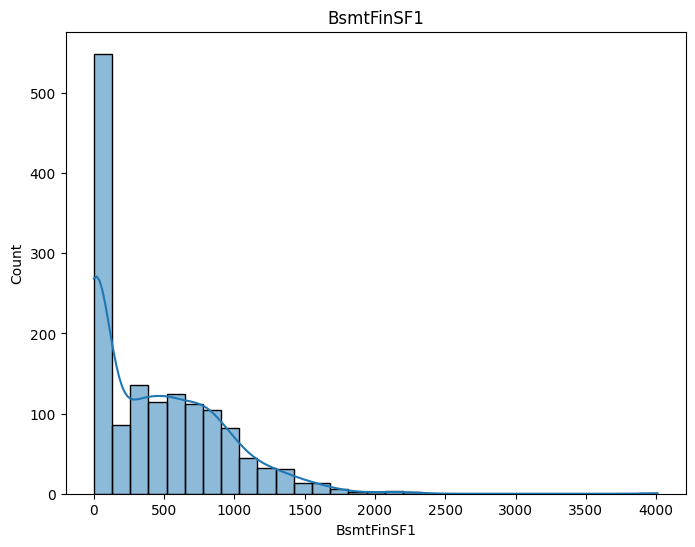

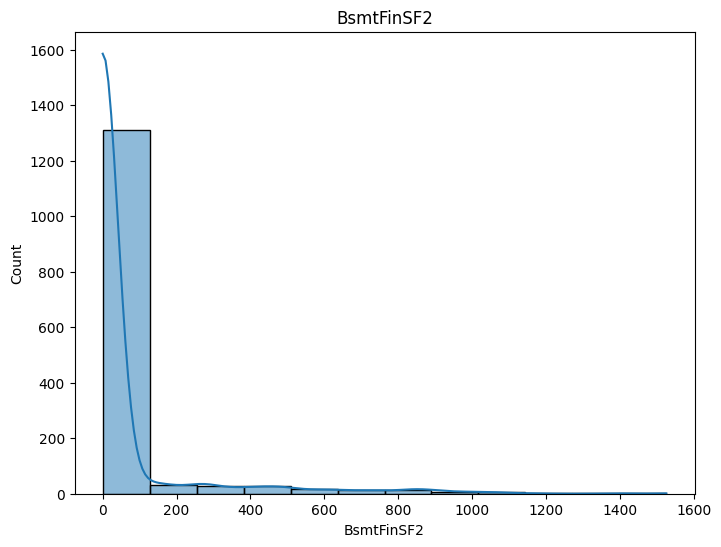

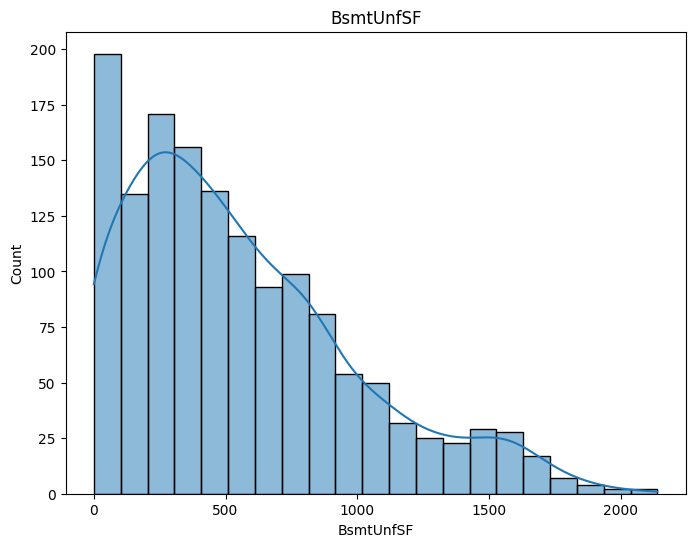

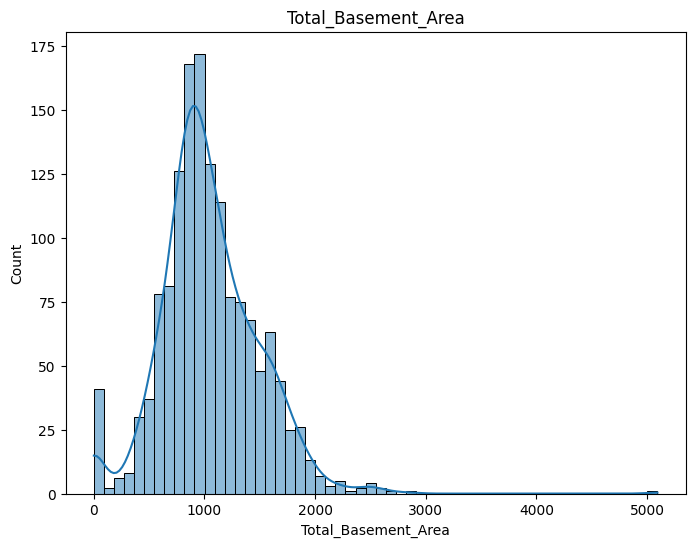

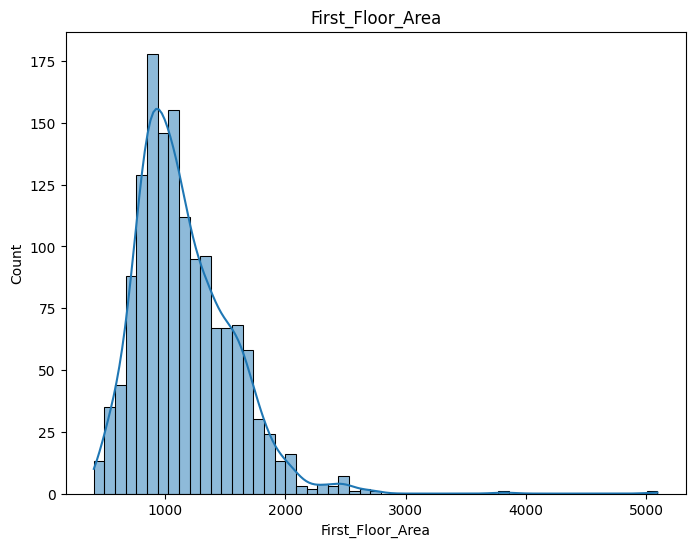

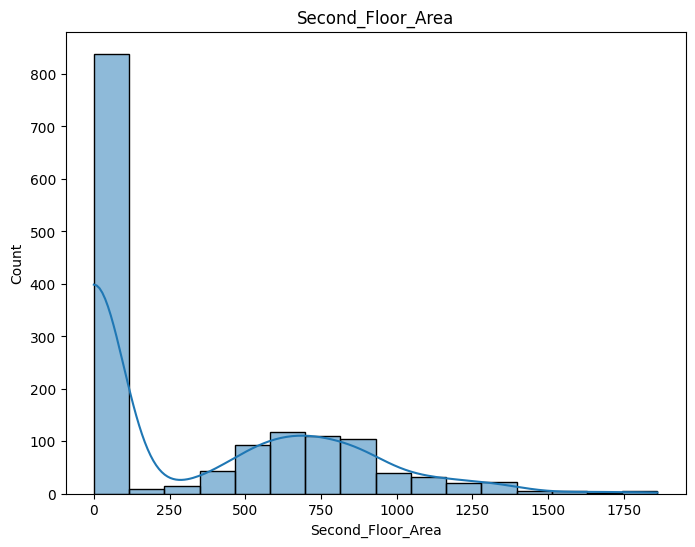

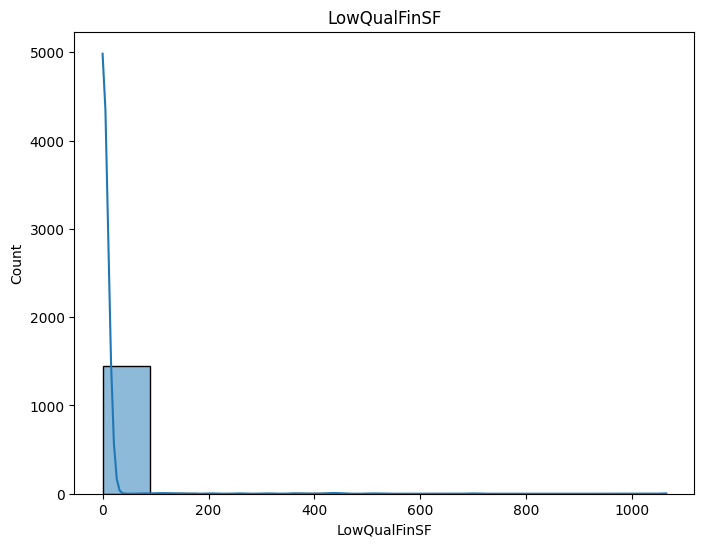

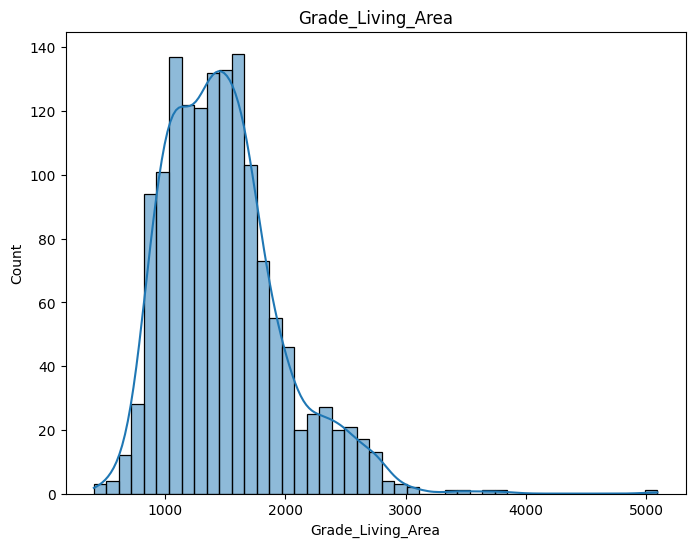

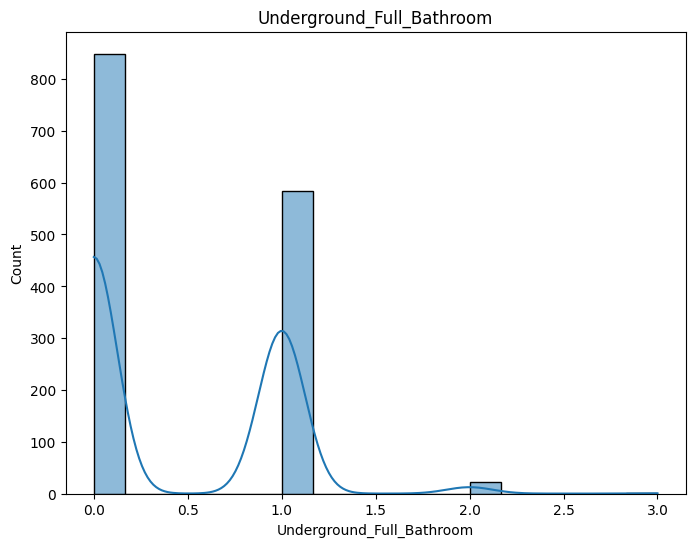

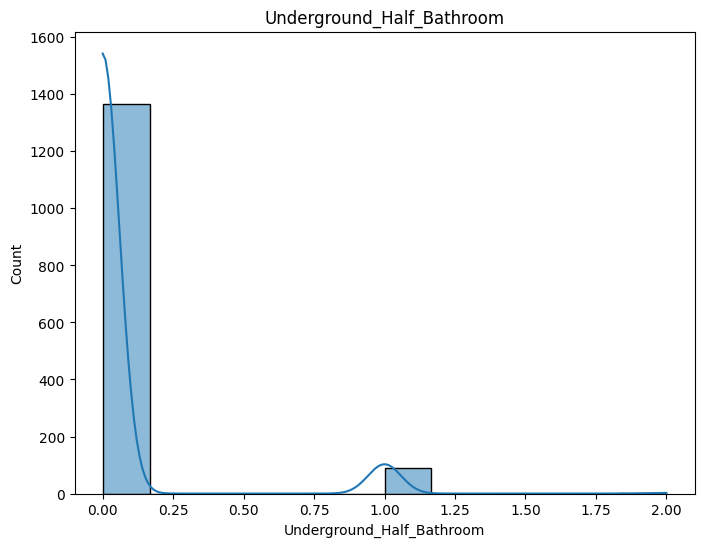

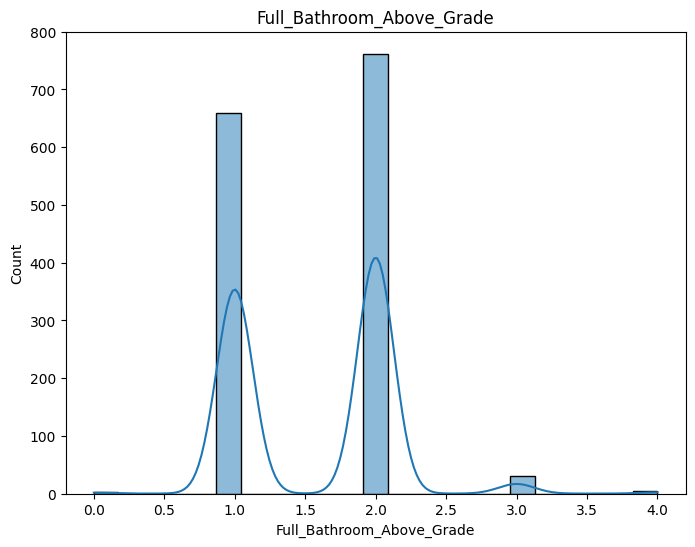

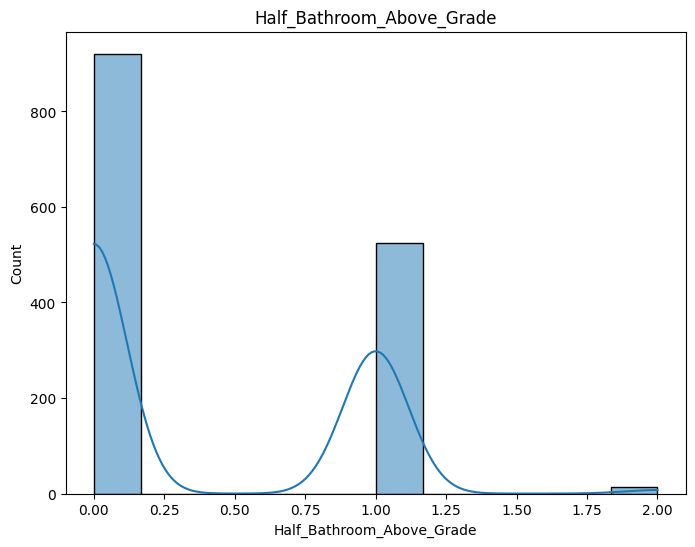

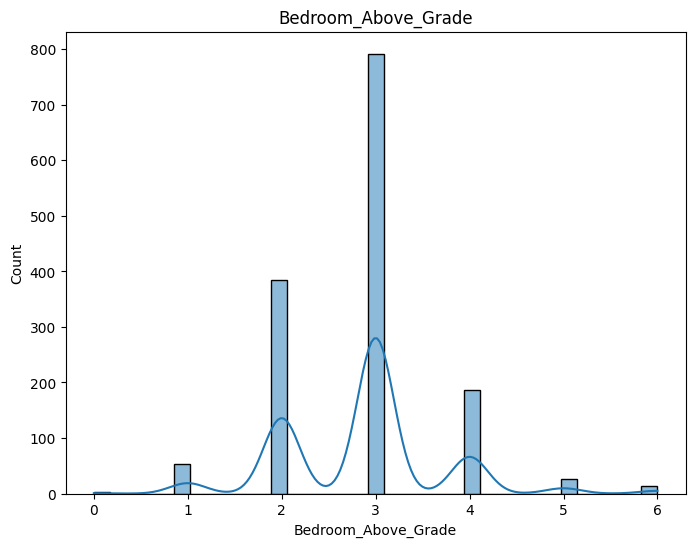

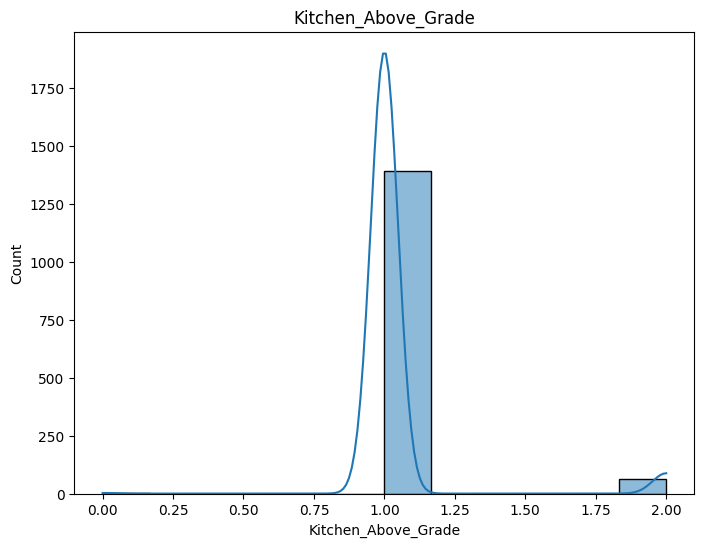

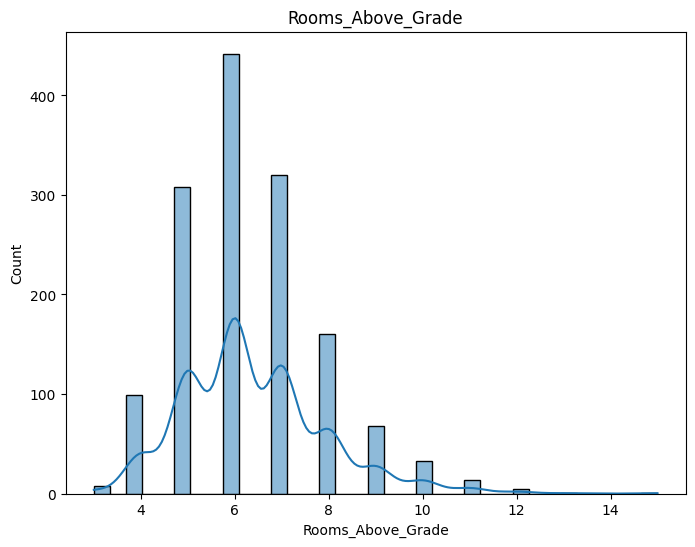

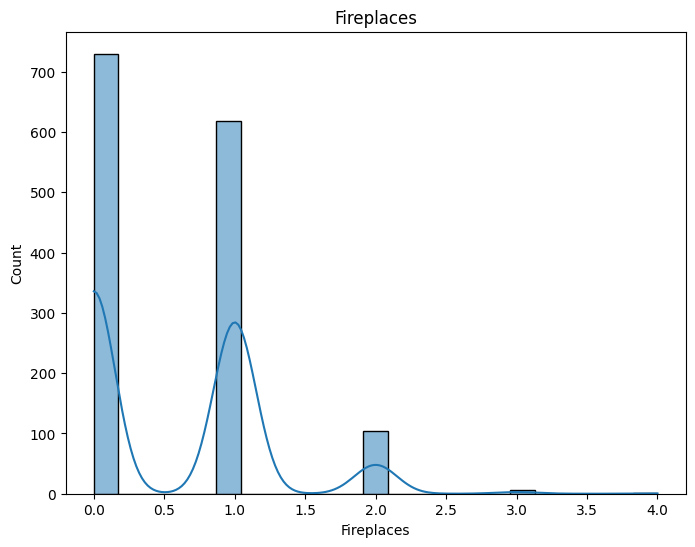

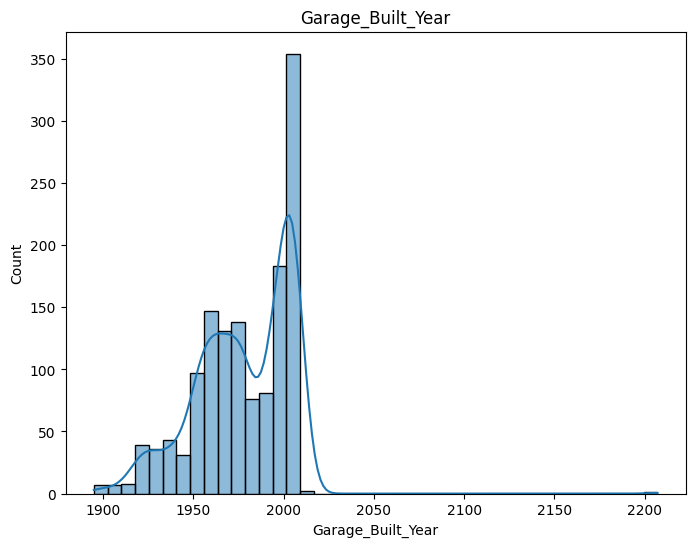

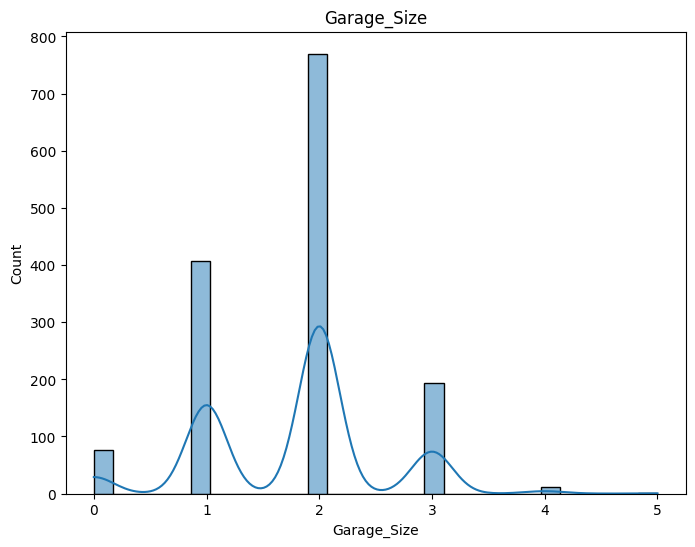

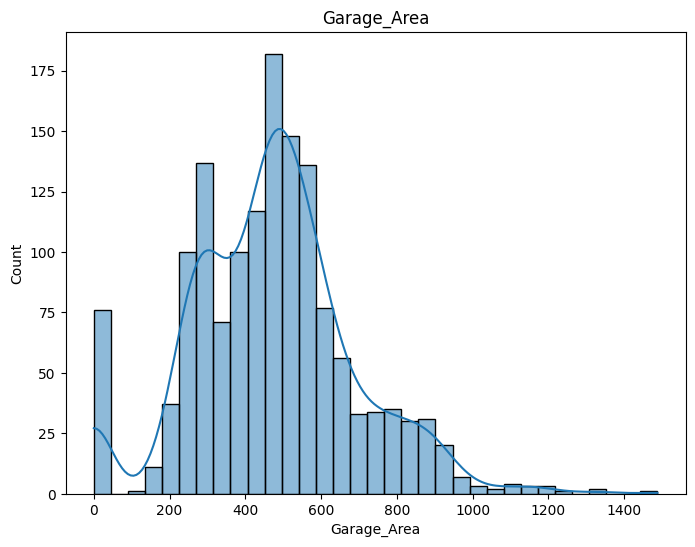

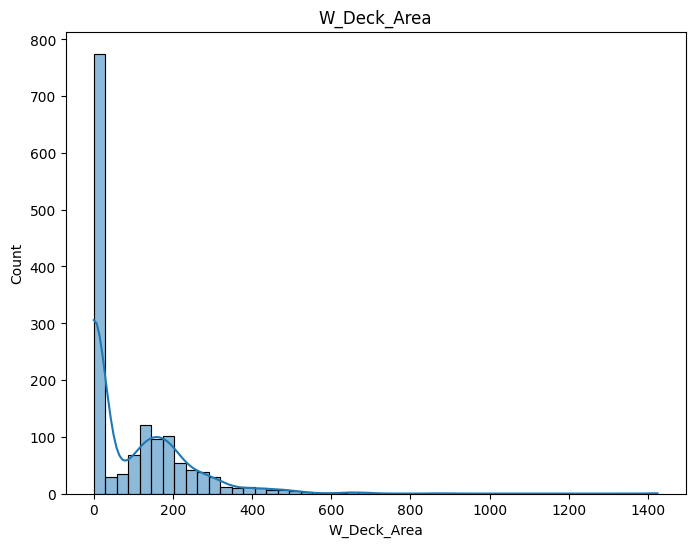

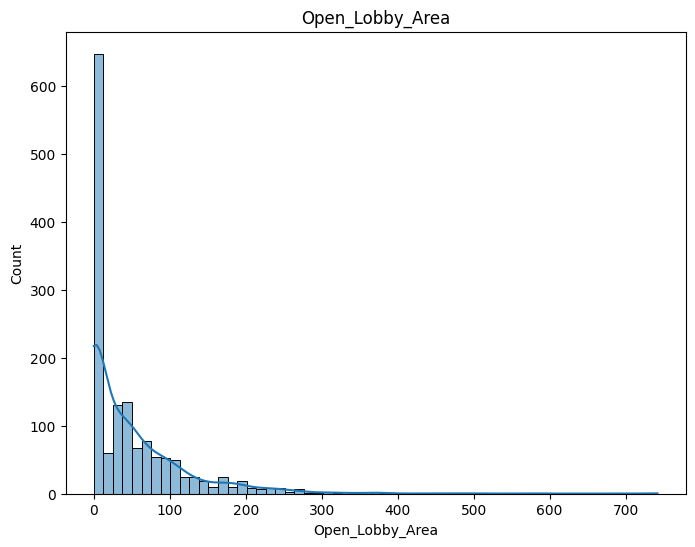

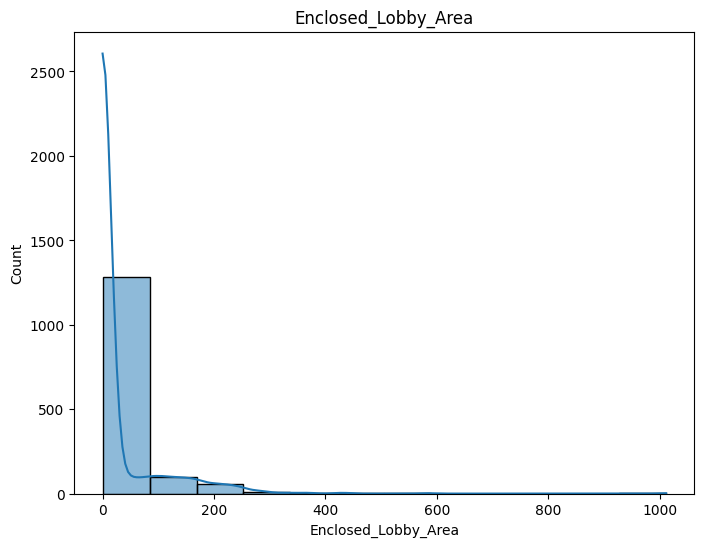

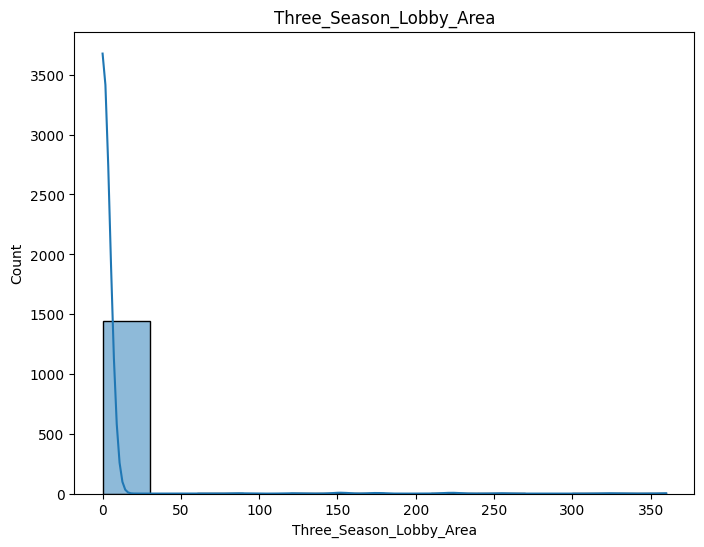

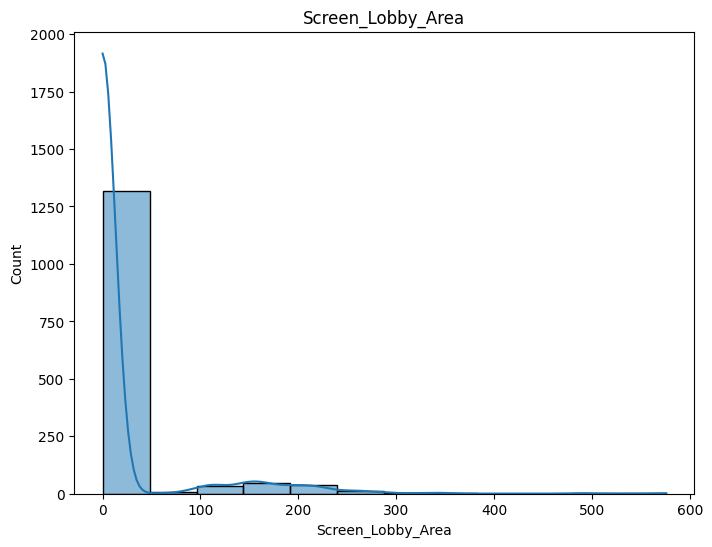

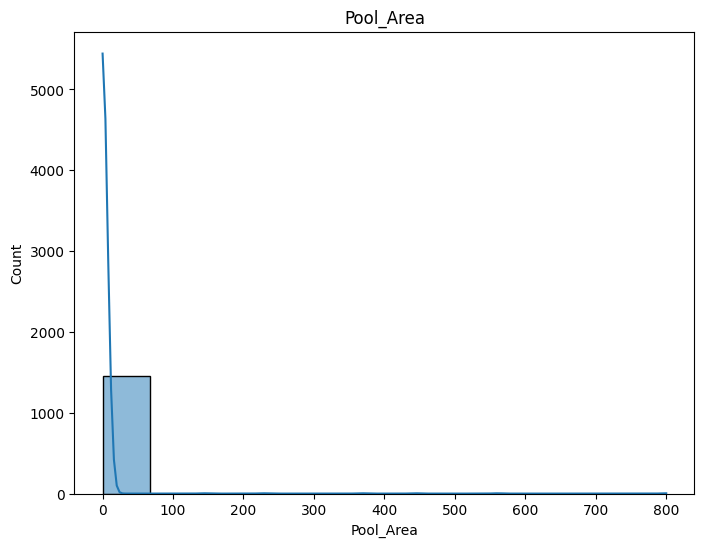

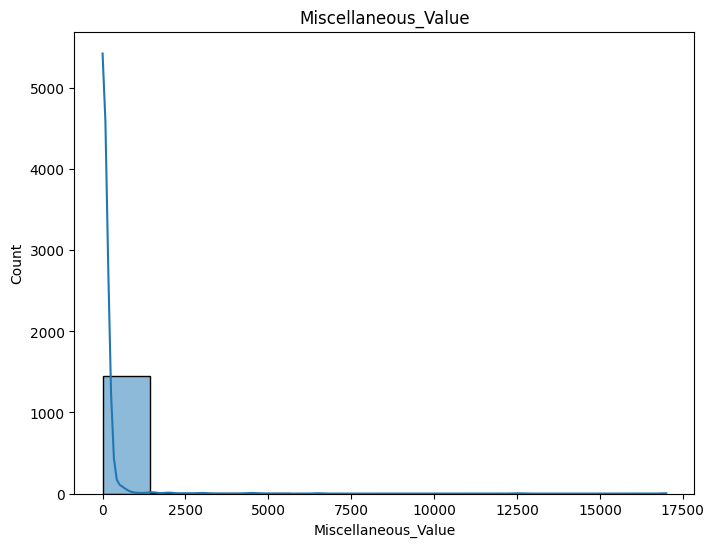

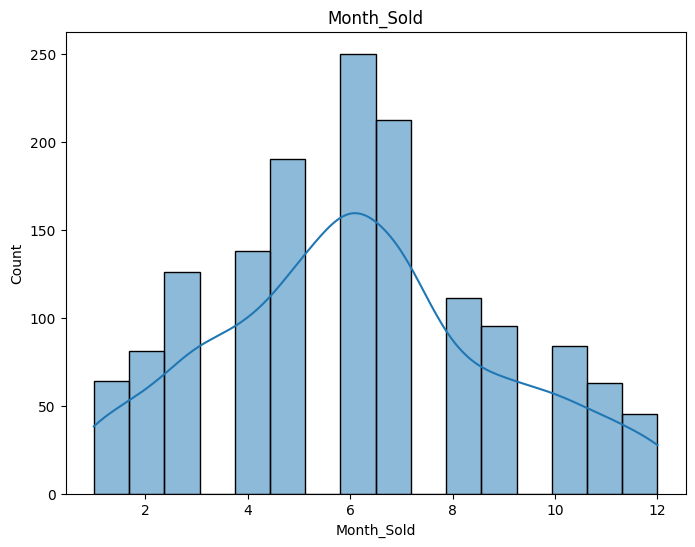

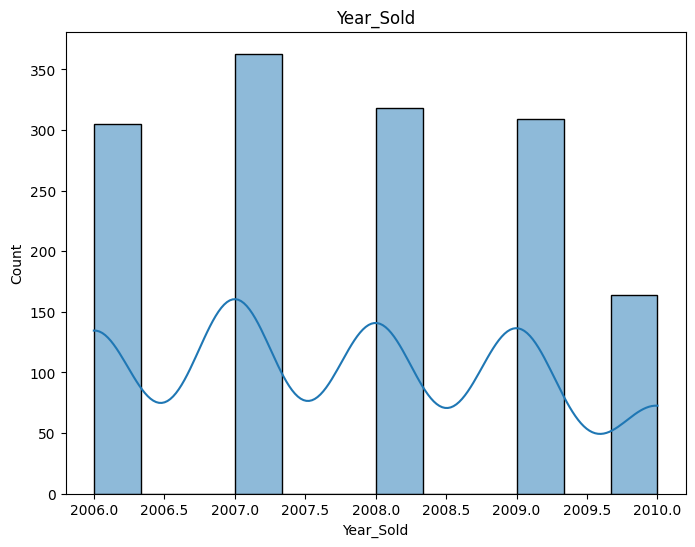

In [ ]:
# Check the distribution of numerical variables
numerical_cols = dataset.select_dtypes(include=np.number).columns
for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.histplot(dataset[col], kde=True)
    plt.title(col)
    plt.show()

In [ ]:
# Data Preprocessing
# Drop columns with too many missing values or irrelevant information
# You can define a threshold for the percentage of missing values to drop columns
threshold = 0.5  # Example threshold: drop columns with more than 50% missing values
columns_to_drop = dataset.columns[dataset.isnull().mean() > threshold]
dataset = dataset.drop(columns_to_drop, axis=1)

In [ ]:
# Perform label encoding on categorical variables
label_encoder = LabelEncoder()
categorical_cols = dataset.select_dtypes(include='object').columns
for col in categorical_cols:
    dataset[col] = label_encoder.fit_transform(dataset[col])

In [ ]:
!pip install sklearn

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [ ]:
from sklearn.impute import SimpleImputer


In [ ]:
# Handle missing values (imputation or dropping)
# For simplicity, let's impute missing values with mean for numerical columns and most frequent for categorical columns
imputer = SimpleImputer(strategy='mean')
 # Impute missing values with mean for numerical columns
dataset[numerical_cols] = imputer.fit_transform(dataset[numerical_cols])

In [ ]:
imputer = SimpleImputer(strategy='most_frequent')

# Impute missing values with most frequent for categorical columns
dataset[categorical_cols] = imputer.fit_transform(dataset[categorical_cols])